The salary of employees depends on many factors: age, level of education, work experience, position held and other characteristics. Companies and applicants want to understand which parameters have the greatest impact on salary, and also be able to predict salary based on these parameters.

This paper uses the "Salary Prediction" dataset from Kaggle, which contains information about employees including their age, gender, education level, position, length of service and actual salary. The main problem is the need to build a model that can predict salary based on available data.

Project objective: To develop and train a machine learning model that can predict employees' salaries according to given parameters. Analyse the factors affecting wages.

In [ ]:
!wget 'https://drive.google.com/uc?id=1xJp0LbvKa-F5qnu3aDmzGi7FnRNjvOmF&export=download' -O salary.csv

--2025-04-02 07:22:55--  https://drive.google.com/uc?id=1xJp0LbvKa-F5qnu3aDmzGi7FnRNjvOmF&export=download
Resolving drive.google.com (drive.google.com)... 74.125.69.100, 74.125.69.101, 74.125.69.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.69.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1xJp0LbvKa-F5qnu3aDmzGi7FnRNjvOmF&export=download [following]
--2025-04-02 07:22:55--  https://drive.usercontent.google.com/download?id=1xJp0LbvKa-F5qnu3aDmzGi7FnRNjvOmF&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.126.132, 2607:f8b0:4001:c1d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.126.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19360 (19K) [application/octet-stream]
Saving to: ‘salary.csv’

salary.csv          100%[===================>]  18.91K  --.-KB/s    in 0s  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("salary.csv")

In [ ]:
df.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB
None


In [ ]:
print(df.describe())

              Age  Years of Experience         Salary
count  373.000000           373.000000     373.000000
mean    37.431635            10.030831  100577.345845
std      7.069073             6.557007   48240.013482
min     23.000000             0.000000     350.000000
25%     31.000000             4.000000   55000.000000
50%     36.000000             9.000000   95000.000000
75%     44.000000            15.000000  140000.000000
max     53.000000            25.000000  250000.000000


In [ ]:
print(df.columns)
df.columns = df.columns.str.strip()
df['Years of Experience'].fillna(df['Years of Experience'].mean(), inplace=True)
df['Salary'].fillna(df['Salary'].mean(), inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Education Level'].fillna(df['Education Level'].mode()[0], inplace=True)
df['Job Title'].fillna(df['Job Title'].mode()[0], inplace=True)
print(df.isnull().sum())

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


<ipython-input-35-23b839f224bf>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Years of Experience'].fillna(df['Years of Experience'].mean(), inplace=True)
<ipython-input-35-23b839f224bf>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [ ]:
print(df.isnull().sum())

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


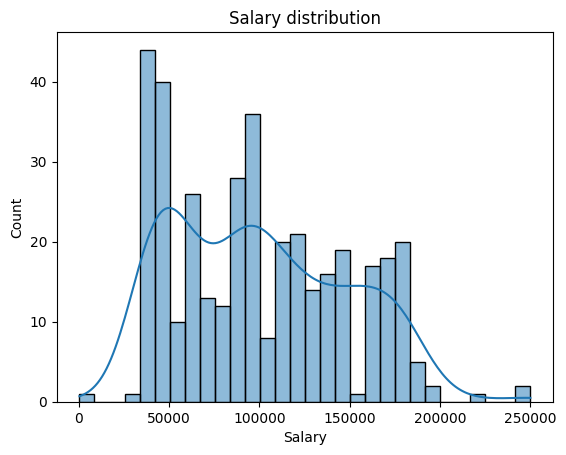

In [ ]:
sns.histplot(df['Salary'], bins=30, kde=True)
plt.title("Salary distribution")
plt.show()

In [ ]:
#This code performs the encoding of categorical features using LabelEncoder from sklearn.preprocessinglibrary.
label_encoders = {}
for col in ['Gender', 'Education Level', 'Job Title']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
scaler = StandardScaler()
df[['Age', 'Years of Experience']] = scaler.fit_transform(df[['Age', 'Years of Experience']])

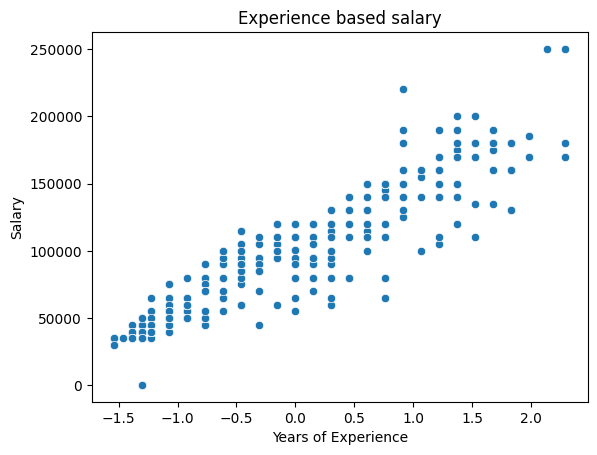

In [ ]:
sns.scatterplot(x=df['Years of Experience'], y=df['Salary'])
plt.title("Experience based salary")
plt.show()

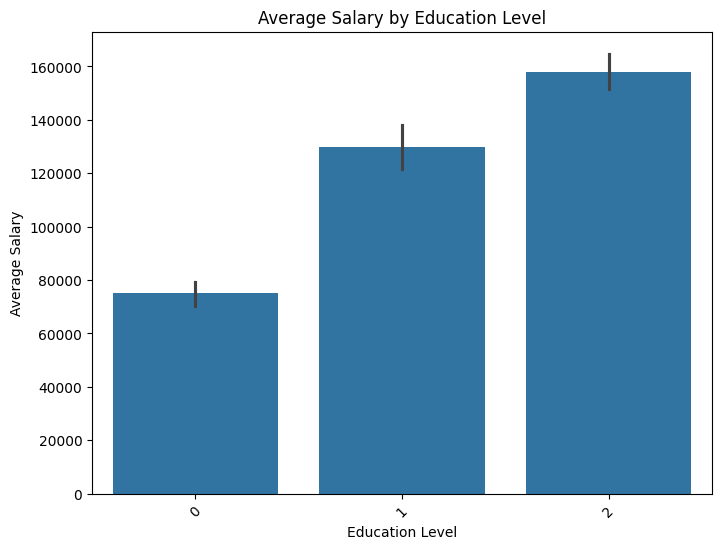

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df['Education Level'], y=df['Salary'], estimator=np.mean)
plt.title("Average Salary by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)
plt.show()

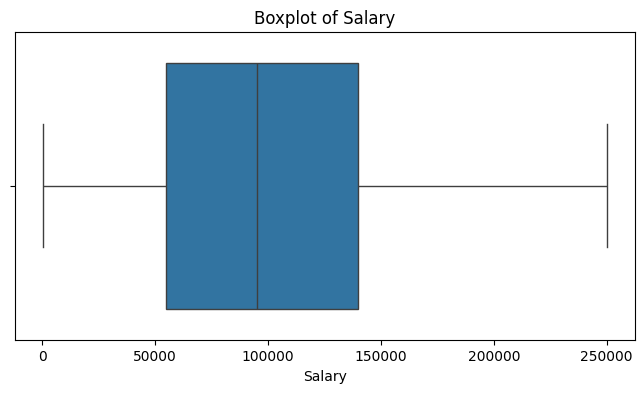

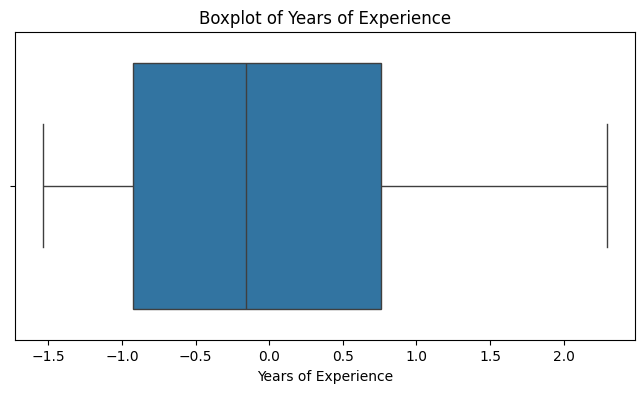

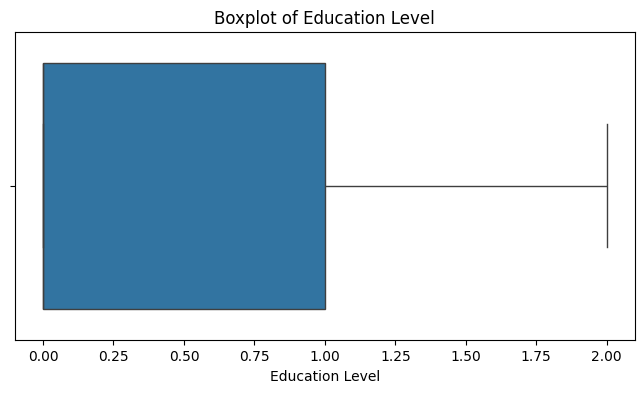

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Salary'])
plt.title("Boxplot of Salary")
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Years of Experience'])
plt.title("Boxplot of Years of Experience")
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Education Level'])
plt.title("Boxplot of Education Level")
plt.show()


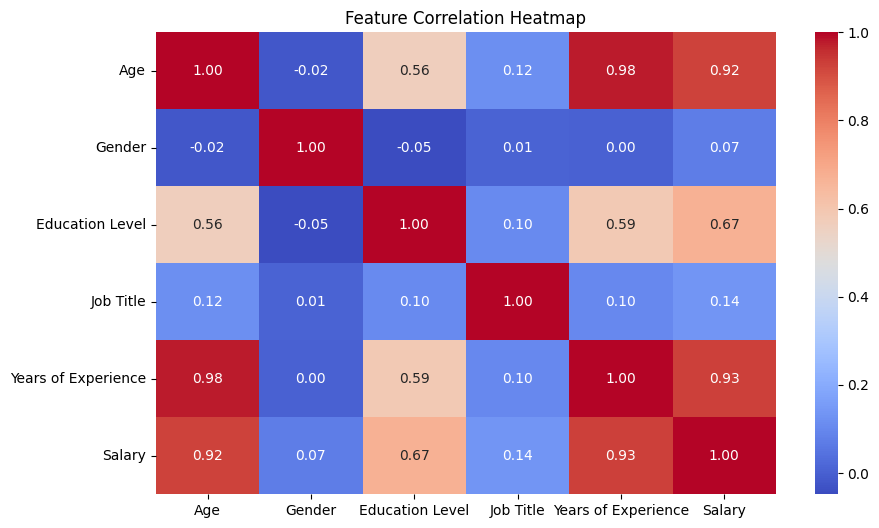

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
X = df[['Education Level', 'Years of Experience']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
# Predictions on test data
y_pred = model.predict(X_test)

# Model quality metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

MAE: 10701.30
MSE: 231562001.72
RMSE: 15217.16
R²: 0.9044


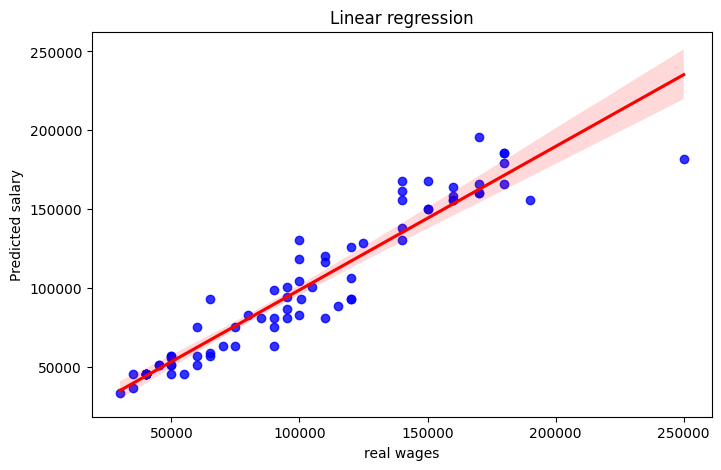

In [ ]:
# Visualization of predictions vs real data, Regression line
plt.figure(figsize=(8,5))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("real wages")
plt.ylabel("Predicted salary")
plt.title("Linear regression")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

df = pd.read_csv("salary.csv")

model_df = df[['Education Level', 'Years of Experience', 'Salary']]  # Use this for model training

model_df['Education Level'] = df['Education Level'].map({"Bachelor's": 0, "Master's": 1, 'PhD': 2})


X = model_df[['Education Level', 'Years of Experience']]
y = model_df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-47-297da9ca8615>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['Education Level'] = df['Education Level'].map({"Bachelor's": 0, "Master's": 1, 'PhD': 2})


In [ ]:
model_df.head(10)

,Education Level,Years of Experience,Salary
0,0.0,5.0,90000.0
1,1.0,3.0,65000.0
2,2.0,15.0,150000.0
3,0.0,7.0,60000.0
4,1.0,20.0,200000.0
5,0.0,2.0,55000.0
6,1.0,12.0,120000.0
7,0.0,4.0,80000.0
8,0.0,1.0,45000.0
9,2.0,10.0,110000.0


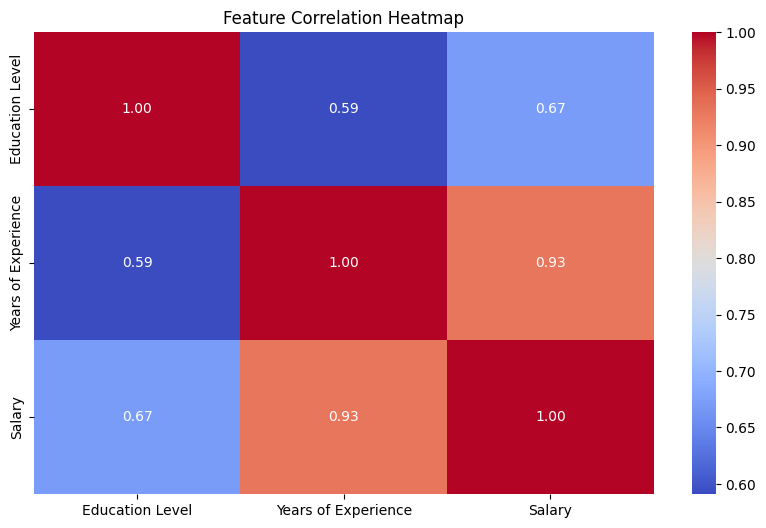

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(model_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

y_train.fillna(y_train.mean(), inplace=True)
y_test.fillna(y_test.mean(), inplace=True)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
# Predictions on test data
y_pred = model.predict(X_test)

# Model quality metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

MAE: 10617.82
MSE: 231066637.21
RMSE: 15200.88
R²: 0.9046


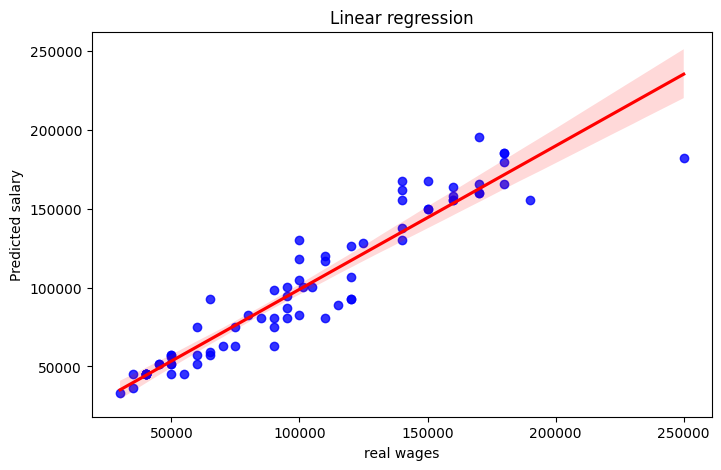

In [ ]:
# Visualization of predictions vs real data, Regression line
plt.figure(figsize=(8,5))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("real wages")
plt.ylabel("Predicted salary")
plt.title("Linear regression")
plt.show()